In [22]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.stats import norm
from scipy import stats


In [260]:
#1. Load the training data
raw_df=pd.read_csv('rawData.csv')
#2. verifying data load

def check_load(df,num_records,num_columns):
    message = 'Validation Failed!'
    if num_records == df.shape[0]:
        if num_columns == df.shape[1]:
            message = 'Validation Passed!'
    return message

print('Verifying data load --- >',check_load(raw_df,1460,81))

Verifying data load --- > Validation Passed!


In [41]:
#3. Check the column headers
print('#Check the column headers: \n',raw_df.columns, '\n')

#4. Check data shape
print('#Check the data shape: \n','There are {} rows, and {} columns'.format(raw_df.shape[0]-1,raw_df.shape[1]),'\n')

#Check the column headers: 
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
   

In [ ]:
#5. Check data types
print('#Check the data types',raw_df.info())

In [19]:
import pandas_profiling
#6. Generate DataFrame Report 
pandas_profiling.ProfileReport(raw_df).to_file('./example.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]


In [31]:
#7. Display summary statistics
print(raw_df.describe())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [55]:
#8. Check duplicated rows
print('Check duplicated rows --- >',raw_df.duplicated().sum())

check duplicated rows --- > 0


In [113]:
aa = []
for x in columns:
    cor_val = raw_df['SalePrice'].corr(raw_df[x])
    print(cor_val)
    aa.append(cor_val)
print('\n')
print(aa)

-0.02191671944343111
-0.08428413512659526
0.3517990965706781
0.26384335387140573
0.7909816005838048
-0.077855894048678
0.5228973328794969
0.5071009671113864
0.477493047095716
0.38641980624215316
-0.011378121450215136
0.21447910554696895
0.6135805515591956
0.6058521846919147
0.3193338028320677
-0.02560613000067959
0.7086244776126522
0.22712223313149404
-0.01684415429735902
0.5606637627484456
0.2841076755947829
0.16821315430073996
-0.1359073708421411
0.5337231555820284
0.46692883675152763
0.4863616774878608
0.6404091972583531
0.6234314389183617
0.3244134445681295
0.31585622711605543
-0.1285779579259565
0.04458366533574845
0.1114465711429111
0.09240354949187317
-0.021189579640303245
0.04643224522381939
-0.02892258516873034
1.0


[-0.02191671944343111, -0.08428413512659526, 0.3517990965706781, 0.26384335387140573, 0.7909816005838048, -0.077855894048678, 0.5228973328794969, 0.5071009671113864, 0.477493047095716, 0.38641980624215316, -0.011378121450215136, 0.21447910554696895, 0.613580551559

In [139]:
#9.Check correlation value with SalePrice

#a. Loop to update the columns with int data type 
columns = []
for col,type in raw_df.dtypes.items():
    if type =='int64' or type=='float64':
        columns.append(col)

#b. Loop to check all columns contained in list
corr_max_col = []
weak_corr = []
median_corr =[]
strong_corr =[]

for col in columns:
    #check the correation of a pair of columns
    corr_val = raw_df['SalePrice'].corr(raw_df[col])
    # print(corr_val)
    #logic to compare corr_max with current corr_val
    if corr_val >0:
        #update the column name and corr value
        corr_max_col.append(col)
    if corr_val >0 and corr_val < 0.3:
        weak_corr.append(col)
    if corr_val >=0.3 and corr_val < 0.7:
        median_corr.append(col)
    if corr_val >=0.7 and corr_val <1:
        strong_corr.append(col)

print('Corr value > 0 --- > ',corr_max_col)
print('\n Weak corr features -- >',weak_corr)
print('\n Median corr features -- >',median_corr)
print('\n Strong corr features -- >',strong_corr)

Corr value > 0 --- >  ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', 'SalePrice']

 Weak corr features -- > ['LotArea', 'BsmtUnfSF', 'BsmtFullBath', 'HalfBath', 'BedroomAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold']

 Median corr features -- > ['LotFrontage', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

 Strong corr features -- > ['OverallQual', 'GrLivArea']


In [214]:
#10. Check missing rows
total = raw_df.isnull().sum().sort_values(ascending=False)
percent = (raw_df.isnull().sum()/raw_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['TotalMissing', 'Percent'])
missing_data = missing_data[missing_data['Percent'] >0]
missing_data

,TotalMissing,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479


In [222]:
for x in missing_data.reset_index()['index'].to_list():
    if x in weak_corr:
        print('{} is a weak correlation'.format(x))
    elif x in median_corr:
        print('{} is a median correlation'.format(x))
    elif x in  strong_corr:
        print('{} is a strong correlation'.format(x))
    else:
        print(x,'\n')

PoolQC 

MiscFeature 

Alley 

Fence 

FireplaceQu 

LotFrontage is a median correlation
GarageQual 

GarageCond 

GarageFinish 

GarageType 

GarageYrBlt is a median correlation
BsmtExposure 

BsmtFinType2 

BsmtQual 

BsmtCond 

BsmtFinType1 

MasVnrArea is a median correlation
MasVnrType 

Electrical 



In [261]:
# Replace Nah with its Mode value for the meadian correlation features
raw_df['GarageYrBlt'].fillna(raw_df['GarageYrBlt'].mode()[0]).inplace=True
raw_df['MasVnrArea'].fillna(raw_df['MasVnrArea'].mode()[0]).inplace=True
raw_df['LotFrontage'].fillna(raw_df['LotFrontage'].mode()[0]).inplace=True

In [264]:
# Drop the features with over 70% missing value
raw_df = raw_df.drop(missing_data[missing_data['Percent']>=0.7].index,axis=1)

In [268]:
# Check the missing feature again 
total = raw_df.isnull().sum().sort_values(ascending=False)
percent = (raw_df.isnull().sum()/raw_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['TotalMissing', 'Percent'])
missing_data = missing_data[missing_data['Percent'] >0]
missing_data

,TotalMissing,Percent
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027
BsmtFinType1,37,0.025342


In [282]:
raw_df[missing_data.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FireplaceQu   770 non-null    object 
 1   LotFrontage   1201 non-null   float64
 2   GarageYrBlt   1379 non-null   float64
 3   GarageType    1379 non-null   object 
 4   GarageFinish  1379 non-null   object 
 5   GarageQual    1379 non-null   object 
 6   GarageCond    1379 non-null   object 
 7   BsmtExposure  1422 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   BsmtFinType1  1423 non-null   object 
 10  BsmtCond      1423 non-null   object 
 11  BsmtQual      1423 non-null   object 
 12  MasVnrType    1452 non-null   object 
 13  MasVnrArea    1452 non-null   float64
 14  Electrical    1459 non-null   object 
dtypes: float64(3), object(12)
memory usage: 171.2+ KB


In [303]:
# replace the missing value with logic if data type is object then None. 
for name,type in raw_df[missing_data.index].dtypes.items():
    if type =='object':
        raw_df[name] = raw_df[name].fillna('none')
    elif type =='float64':
        raw_df[name]= raw_df[name].fillna(0)


In [ ]:
#identify the outliers
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(16, 4))
axes = np.ravel(axes)
col_name = ['GrLivArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1','LotArea']
for i, c in zip(range(5), col_name):
    df_train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='r')

#delete outliers
print(df_train.shape)
df_train = df_train[df_train['GrLivArea'] < 4500]
df_train = df_train[df_train['LotArea'] < 100000]
df_train = df_train[df_train['TotalBsmtSF'] < 3000]
df_train = df_train[df_train['1stFlrSF'] < 2500]
df_train = df_train[df_train['BsmtFinSF1'] < 2000]

print(df_train.shape)

for i, c in zip(range(5,10), col_name):
    df_train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='b')


In [308]:
raw_df['MSSubClass'].head()

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: int64

# #Feature Engineering

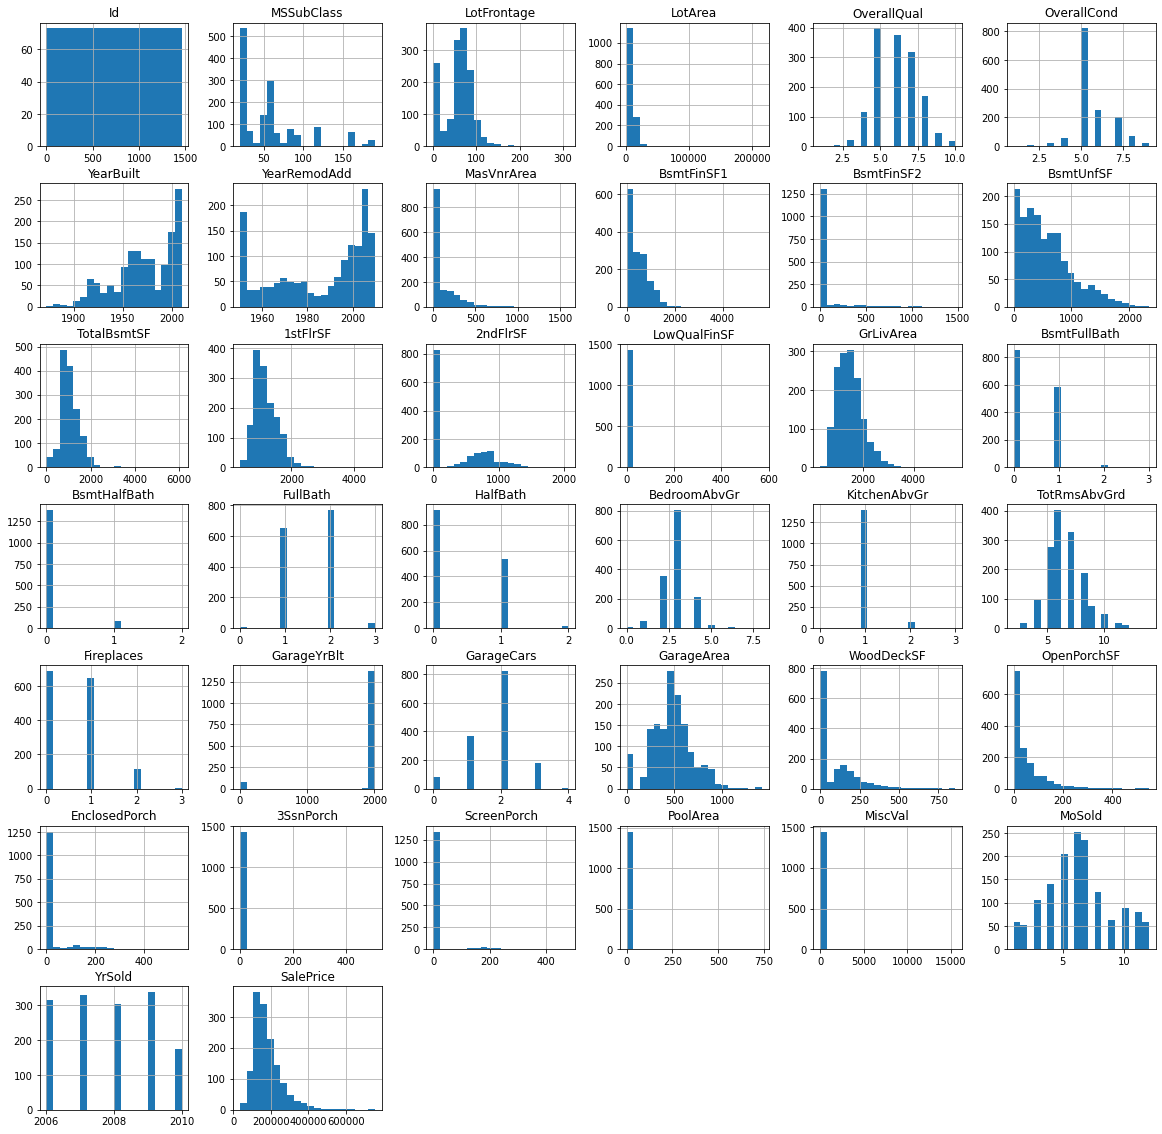

In [306]:
#check distribution of all the inputs
raw_df.hist(figsize=(20, 20), bins=20)
plt.show()

<AxesSubplot:>

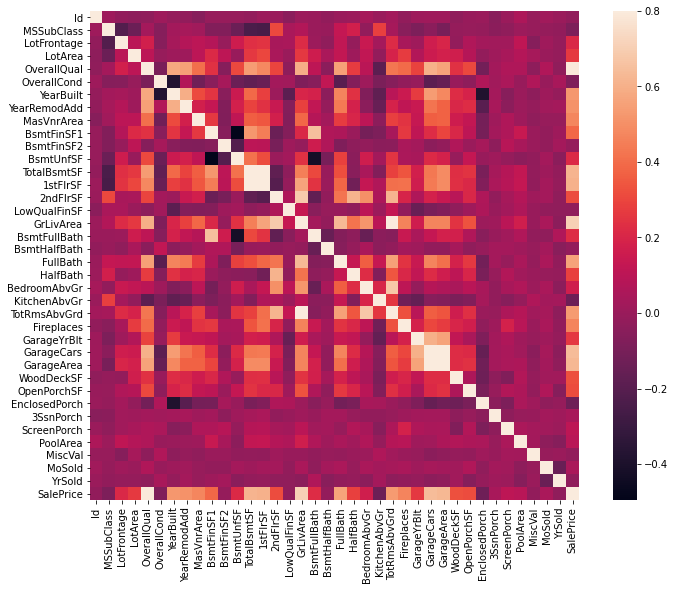

In [307]:
#correlation matrix
corrmat = raw_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
